<a href="https://colab.research.google.com/github/Syedzamin07/cost-optimized-credit-card-fraud-detection/blob/main/notebook/01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding & Sanity Check

**Purpose**
This notebook performs a focused, business-aware inspection of the raw dataset. The goal is to understand **scale, imbalance, and constraints**—not to model, engineer features, or optimize performance.

**Scope**

* Load raw data (no mutation)
* Verify dataset size and structure
* Quantify fraud imbalance
* Provide *limited*, non-invasive visualization to support metric choice
* Explain PCA anonymization and interpretability limits

**Out of Scope**

* No scaling
* No feature engineering
* No resampling (SMOTE)
* No modeling or metrics

---

## 1. Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(url)
print(f"Total Transactions: {df.shape[0]:,}")
print(f"Total Features: {df.shape[1]}")

df.head()

Total Transactions: 284,807
Total Features: 31


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


---

## 2. Class Imbalance (Business Reality Check)

In [2]:
counts = df['Class'].value_counts()
legit_count = counts[0]
fraud_count = counts[1]
fraud_ratio = fraud_count / len(df) * 100

print(f"Legitimate Transactions: {legit_count:,}")
print(f"Fraudulent Transactions: {fraud_count:,}")
print(f"Fraud Ratio: {fraud_ratio:.4f}%")

Legitimate Transactions: 284,315
Fraudulent Transactions: 492
Fraud Ratio: 0.1727%


**Why this matters:**
A model predicting *all transactions as legitimate* already achieves ~99.83% accuracy. This makes **Accuracy meaningless** and motivates downstream use of **PR-AUC** and **cost-based evaluation**.

---

## 3. Minimal Visualization (Justified, Not Exploratory)

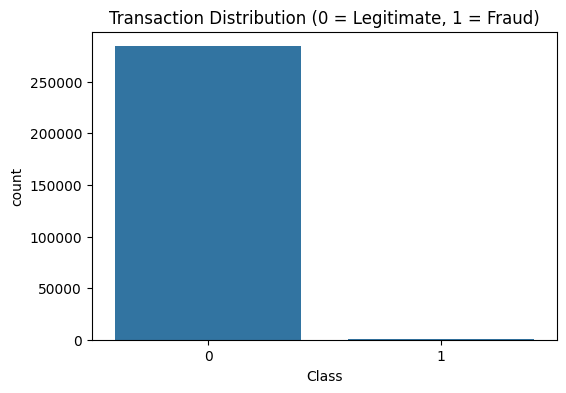

In [3]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Transaction Distribution (0 = Legitimate, 1 = Fraud)')
plt.show()

> This visualization is included **only** to visually reinforce the extreme skew. No feature-level plots are shown, as V1–V28 are PCA components and not semantically interpretable.

---

## 4. Business Context: PCA Anonymization (V1–V28)

The dataset contains features named V1–V28.

**Why are they anonymized?**

*   **Regulation & Privacy**: Banks cannot share PII (GDPR, PCI-DSS, CCPA).
*   **PCA Transformation**: Original transactional features were transformed using PCA to preserve variance while removing sensitive semantics.

**Implications for this project**

*   No semantic interpretation (e.g., V14 ≠ “location deviation”).
*   Behavioral signals still exist — fraud manifests as mathematical outliers.
*   Correlation heatmaps are intentionally avoided — PCA components are orthogonal by construction and misleading to interpret directly.

## 5. Key Takeaways for Downstream Decisions

*   Fraud is extremely rare (0.17%) → Accuracy is misleading
*   Cost of mistakes is asymmetric → Business-driven thresholds required
*   PCA limits interpretability → Explainability must be handled carefully (SHAP later)

**Next Step:**
Establish the financial floor using naive decision rules in `baseline_analysis.ipynb`.